## Convolution

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [12]:
pad = int(5/3)
pad

1

In [13]:
sobelKernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

In [14]:
avarageKernel = np.array([
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]
])

In [26]:
def convolution(image, kernel):
    imageHeight, imageWidth = len(image), len(image[0]) #gives the number of rows and columns of the matrices
    kernelHeight, kernelWidth = len(kernel), len(kernel[0])

    padHeight = kernelHeight // 2   # floor division
    padWidth = kernelWidth // 2

    paddedImage = np.pad(image,((padHeight, padHeight), (padWidth, padWidth)), mode = 'constant', constant_values = 0)

    result = np.zeros_like(image)

    for i in range(imageHeight):
        for j in range(imageWidth):
            sum = 0
            for a in range(kernelHeight):
                for b in range(kernelWidth):
                    sum += paddedImage[ i + a ][ j + b ] * kernel[a][b]
            result[i][j] = sum
    return result

In [44]:
image = cv2.imread('ganesh.jpg',0)

In [45]:
image = cv2.resize(image,(512,512))

In [46]:
convo = convolution(image,sobelKernel)
np.shape(convo)

(512, 512)

In [47]:
convo2 = convolution(image,avarageKernel)
np.shape(convo2)

(512, 512)

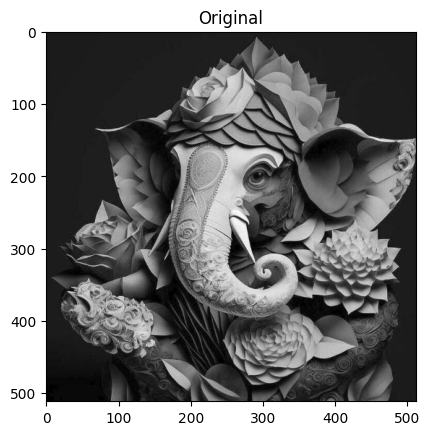

In [48]:
plt.imshow(image,cmap='gray')
plt.title("Original")
plt.show()

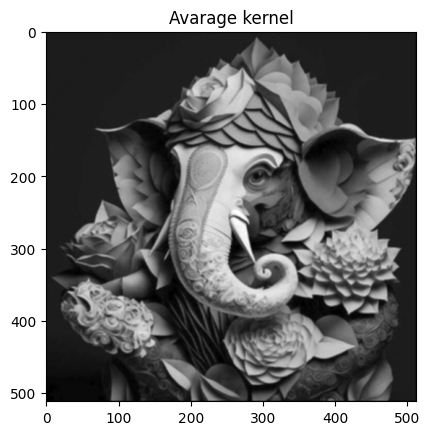

In [49]:
plt.imshow(convo2,cmap='gray')
plt.title("Avarage kernel")
plt.show()


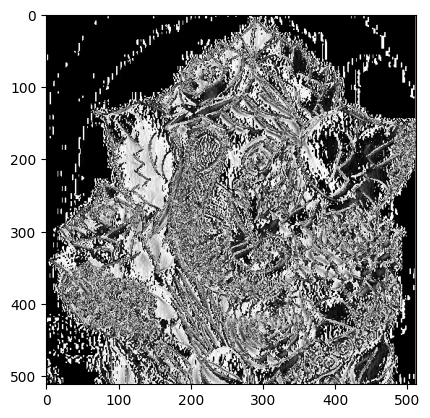

In [50]:
plt.imshow(convo,cmap='gray')
plt.show()

## Median Filtering

In [89]:
def median_filtering(img):
    
    row = img.shape[0]
    col = img.shape[1]
    
    image = np.zeros((row, col), dtype = 'int')
    
    img = np.pad(img, ((1,1), (1,1)), mode = 'constant', constant_values = 0)
    for i in range(1, row-1):
        for j in range(1,col-1):
            list = [img[i][j],img[i-1][j],img[i+1][j],img[i][j-1],img[i][j+1],img[i-1][j-1],img[i-1][j+1],img[i+1][j-1],img[i+1][j+1]]
            list.sort()
            image[i][j] = list[4]
    return image


In [95]:
img = cv2.imread('camerasalt.jpg',0)

In [96]:
img = cv2.resize(img,(200,200))

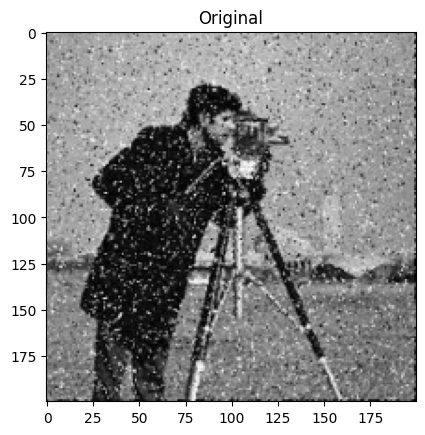

In [97]:
plt.imshow(img,cmap='gray')
plt.title("Original")
plt.show()

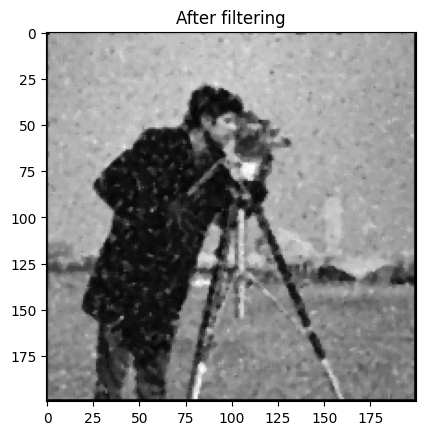

In [98]:
imm = median_filtering(img)
plt.imshow(imm,cmap = 'gray')
plt.title("After filtering")
plt.show()